In [41]:
import numpy as np
import matplotlib.pyplot as plt
import typing as tp
import itertools as it

In [18]:
SIZE = 20

In [70]:
def gen_utility_profiles(samples: np.ndarray):
    samples_with_zero = np.insert(samples, 0, 0)
    sorted_inc = np.sort(samples_with_zero)
    sorted_dec = sorted_inc[::-1]
    return np.cumsum(samples), np.cumsum(sorted_inc), np.cumsum(sorted_dec)


def gen_composite_utility_profiles(samples_g, samples_d, epsilon, lmbd):
    composite_profile = np.array([
        lmbd*((1-epsilon)*d + epsilon*g) 
        for g, d in zip(samples_g, samples_d)
    ])
    return gen_utility_profiles(composite_profile)


def guarantee_SB_2(utility_profile: np.ndarray):
    u_size = utility_profile.size
    m = utility_profile.size - 1
    u = utility_profile
    
    x = np.zeros((u_size, u_size))
    for k in range(u_size):
        for l in range(u_size):
            if l + k >= u_size:
                continue
            x[k][l] = m * (u[l + k] - u[l]) / (m + k)
    
    k_max, l_max = np.unravel_index(np.argmax(x, axis=None), x.shape)
    return (l_max + k_max) * u[l_max] / (m + k_max) + (m - l_max) * u[l_max + k_max]/ (m + k)


def guarantee_SB(utility_profile: np.ndarray, n=2):
    return guarantee_SB_2(utility_profile)


def _partitions_utilities(utility_profile: tp.List[np.ndarray]):
    m = utility_profile[0].size
    
    partitions = [
        comb for comb in it.combinations(range(m), len(utility_profile)) 
        if sum(comb) == m - 1
    ]
    return [
        sum(u[p] for p, u in zip(prt, utility_profile))
        for prt in partitions
    ]


def max_min(utility_profile: tp.List[np.ndarray]):
    return max(_partitions_utilities(utility_profile))/len(utility_profile)


def min_max(utility_profile: tp.List[np.ndarray]):
    return min(_partitions_utilities(utility_profile))/len(utility_profile)


def guarantee_DC(utility: np.ndarray, n=2):
    return max_min([utility]*n)/n + (n-1)*min_max([utility]*n)/n

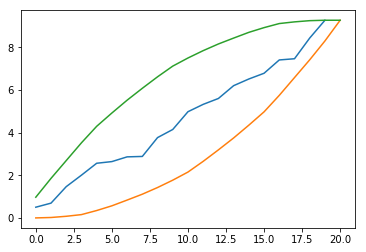

In [20]:
samples_gamma = np.random.uniform(low=0.0, high=1.0, size=SIZE)

u, u_vex, u_cav = gen_utility_profiles(samples_gamma)

plt.plot(u)
plt.plot(u_vex)
plt.plot(u_cav)

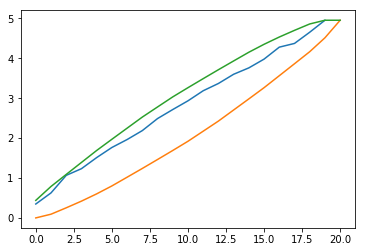

In [21]:
samples_delta = np.random.uniform(low=0.0, high=1.0, size=SIZE)

v, v_vex, v_cav = gen_composite_utility_profiles(samples_gamma, samples_delta, 0.5, 0.5)

plt.plot(v)
plt.plot(v_vex)
plt.plot(v_cav)

In [22]:
guarantee_SB(samples_delta)

0.4247817852145585

In [65]:
max_min([samples_delta]*2)

0.6646035524762652

In [67]:
min_max([samples_delta]*2)

0.28256484947533017

In [68]:
guarantee_DC(samples_delta)

0.4735842009757977